# PRE READING

### In An Introduction to Statistical Learning External link 2nd Edition, read the following sections:

### 3.2 Multiple Linear Regression (pages 71-72)

### 3.2.1 Estimating the Regression Coefficients (pages 72-75)

### 7.1 Polynomial Regression (pages 290-292)

### Remember, there are graded questions below that you'll be more prepared to answer if you do the reading.

# Exercise: Features: Must We Pick Just One?

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the file "Advertising.csv"
df = pd.read_csv('Advertising.csv')

# Take a quick look at the dataframe
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.shape

(200, 4)

In [4]:
# Define an empty Pandas dataframe to store the R-squared value associated with each 
# predictor for both the train and test split
df_results = pd.DataFrame(columns=['Predictor', 'R2 Train', 'R2 Test'])
df_results.head()

,Predictor,R2 Train,R2 Test


<Axes: xlabel='TV', ylabel='Sales'>

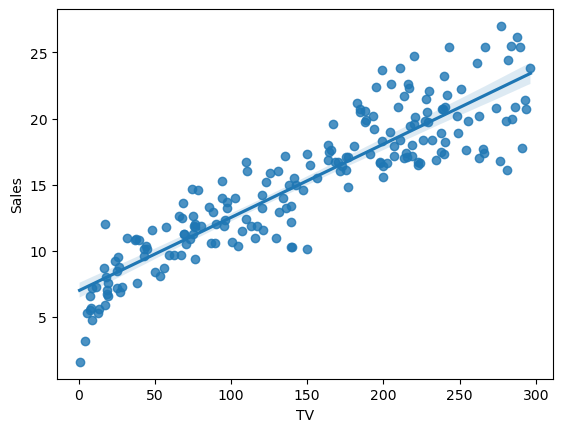

In [5]:
sns.regplot(data=df,x='TV',y='Sales')

<Axes: xlabel='Radio', ylabel='Sales'>

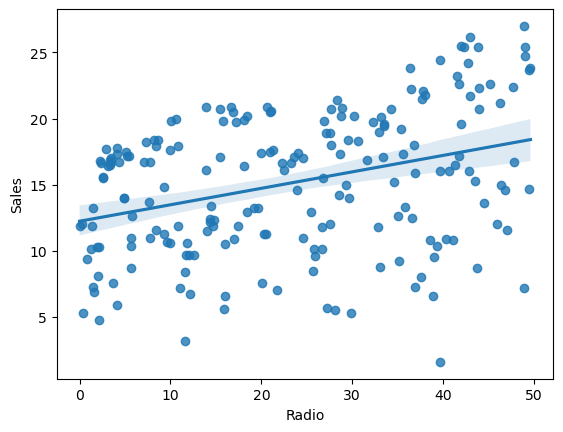

In [6]:
sns.regplot(data=df,x='Radio',y='Sales')

<Axes: xlabel='Newspaper', ylabel='Sales'>

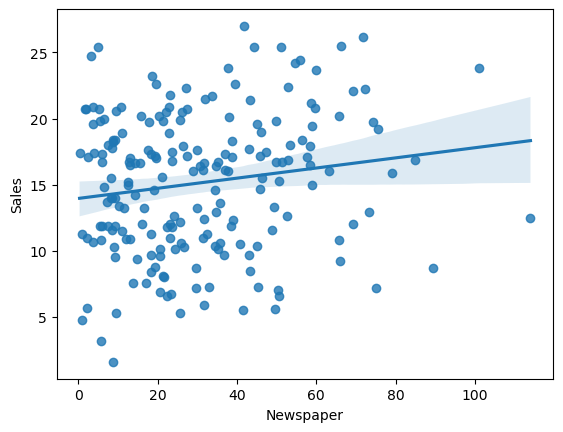

In [7]:
sns.regplot(data=df,x='Newspaper',y='Sales')

# Exercise: Fitting a Multi-Regression Model

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable
%matplotlib inline


In [2]:
# Read the file "Advertising.csv"
df = pd.read_csv('Advertising.csv')


In [3]:
# Take a quick look at the data to list all the predictors
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.shape

(200, 4)

In [5]:
### edTest(test_mse) ###

# Initialize a list to store the MSE values
mse_list = []

# Create a list of lists of all unique predictor combinations
# For example, if you have 2 predictors,  A and B, you would 
# end up with [['A'],['B'],['A','B']]
cols = [['TV'],['Radio'],['Newspaper'],['TV','Radio'],['TV','Newspaper'],['Radio','Newspaper'],['TV','Radio','Newspaper']]

# Loop over all the predictor combinations 
for i in cols:

    # Set each of the predictors from the previous list as x
    x = df[i]
    
    # Set the "Sales" column as the reponse variable
    y = df['Sales']
   
    # Split the data into train-test sets with 80% training data and 20% testing data. 
    # Set random_state as 0
    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=0)

    # Initialize a Linear Regression model
    lreg = LinearRegression()

    # Fit the linear model on the train data
    lreg.fit(x_train,y_train)

    # Predict the response variable for the test set using the trained model
    y_pred = lreg.predict(x_test)
    
    # Compute the MSE for the test data
    MSE = mean_squared_error(y_test,y_pred)
    
    # Append the computed MSE to the initialized list
    mse_list.append(MSE)


In [6]:
# Helper code to display the MSE for each predictor combination
t = PrettyTable(['Predictors', 'MSE'])

for i in range(len(mse_list)):
    t.add_row([cols[i],round(mse_list[i],3)])

print(t)


+------------------------------+--------+
|          Predictors          |  MSE   |
+------------------------------+--------+
|            ['TV']            | 6.639  |
|          ['Radio']           | 30.801 |
|        ['Newspaper']         | 34.973 |
|       ['TV', 'Radio']        | 4.477  |
|     ['TV', 'Newspaper']      |  5.94  |
|    ['Radio', 'Newspaper']    | 31.445 |
| ['TV', 'Radio', 'Newspaper'] | 4.523  |
+------------------------------+--------+


# Design Matrix: Creating Dummy/Indicator Variables 

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
# Load the credit data.
df = pd.read_csv('credit.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [9]:
df.shape

(400, 11)

In [10]:
df.isnull().sum()

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Ethnicity    0
Balance      0
dtype: int64

In [11]:
# The response variable will be 'Balance.'
x = df.drop('Balance', axis=1)
y = df['Balance']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
# Trying to fit on all features in their current representation throws an error.
try:
    test_model = LinearRegression().fit(x_train, y_train)
except Exception as e:
    print('Error!:', e)

Error!: could not convert string to float: 'Female'


In [13]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below.
answer1 = 'B. Some columns are strings'

In [14]:
# Inspect the data types of the DataFrame's columns.
df.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [15]:
numeric_features = ['Income','Limit','Rating','Cards','Age','Education']
numeric_features

['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']

In [16]:
y_train

3       964
18      891
202       0
250       0
274     967
       ... 
71     1103
106       0
270     136
348       0
102    1587
Name: Balance, Length: 320, dtype: int64

In [17]:
### edTest(test_model1) ###
# Fit a linear model using only the numeric features in the dataframe.
model1 = LinearRegression().fit(x_train[numeric_features], y_train)

# Report train and test R2 scores.
train_score = model1.score(x_train[numeric_features], y_train)
test_score = model1.score(x_test[numeric_features], y_test)
print('Train R2:', train_score)
print('Test R2:', test_score)

Train R2: 0.8884475002185803
Test R2: 0.8212531865399556


In [18]:
# Look at unique values of Ethnicity feature.
print('In the train data, Ethnicity takes on the values:', list(x_train['Ethnicity'].unique()))

In the train data, Ethnicity takes on the values: ['Asian', 'Caucasian', 'African American']


In [19]:
x_train.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
3,148.924,9504,681,3,36,11,Female,No,No,Asian
18,49.570,6384,448,1,28,9,Female,No,Yes,Asian
202,21.038,1448,145,2,58,13,Female,No,Yes,Caucasian
250,10.363,2430,191,2,47,18,Female,No,Yes,Asian
274,30.550,5869,439,5,81,9,Female,No,No,African American


In [27]:
### edTest(test_design) ###
# Create x train and test design matrices creating dummy variables for the categorical.
# hint: use pd.get_dummies() with the drop_first hyperparameter for this
x_train_dummies = pd.get_dummies(x_train[['Gender','Student','Married','Ethnicity']],dtype='float64',drop_first=True)
x_train_design = pd.concat([x_train,x_train_dummies],axis=1)
x_train_design.drop(['Gender','Student','Married','Ethnicity'],axis=1,inplace=True)

x_test_dummies = pd.get_dummies(x_test[['Gender','Student','Married','Ethnicity']],dtype='float64',drop_first=True)
x_test_design = pd.concat([x_test,x_test_dummies],axis=1)
x_test_design.drop(['Gender','Student','Married','Ethnicity'],axis=1,inplace=True)
x_train_design.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
3,148.924,9504,681,3,36,11,1.0,0.0,0.0,1.0,0.0
18,49.570,6384,448,1,28,9,1.0,0.0,1.0,1.0,0.0
202,21.038,1448,145,2,58,13,1.0,0.0,1.0,0.0,1.0
250,10.363,2430,191,2,47,18,1.0,0.0,1.0,1.0,0.0
274,30.550,5869,439,5,81,9,1.0,0.0,0.0,0.0,0.0


In [31]:
# Confirm that all data types are now numeric.
x_train_design.dtypes

Income                 float64
Limit                    int64
Rating                   int64
Cards                    int64
Age                      int64
Education                int64
Gender_Female          float64
Student_Yes            float64
Married_Yes            float64
Ethnicity_Asian        float64
Ethnicity_Caucasian    float64
dtype: object

In [32]:
### edTest(test_model2) ###
# Fit model2 on design matrix
model2 = LinearRegression().fit(x_train_design, y_train)

# Report train and test R2 scores
train_score = model2.score(x_train_design, y_train)
test_score = model2.score(x_test_design, y_test)
print('Train R2:', train_score)
print('Test R2:', test_score)

Train R2: 0.9552255011405162
Test R2: 0.9522674050276463


In [33]:
# Note that the intercept is not a part of .coef_ but is instead stored in .intercept_.
coefs = pd.DataFrame(model2.coef_, index=x_train_design.columns, columns=['beta_value'])
coefs

,beta_value
Income,-7.554059
Limit,0.198058
Rating,0.971292
Cards,19.123826
Age,-0.603695
Education,-1.078674
Gender_Female,-12.493725
Student_Yes,418.435398
Married_Yes,-6.150365
Ethnicity_Asian,13.295548


[Text(0.5, 1.0, 'Model Coefficients')]

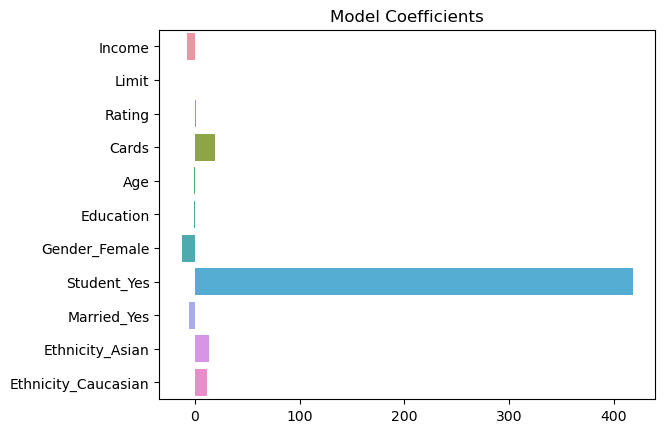

In [34]:
# Visualize crude measure of feature importance.
sns.barplot(data=coefs.T, orient='h').set(title='Model Coefficients')

In [50]:
best_cat_feature =x_train_design[['Student_Yes']]
best_cat_feature

,Student_Yes
3,0.0
18,0.0
202,0.0
250,0.0
274,0.0
...,...
71,0.0
106,0.0
270,0.0
348,0.0


In [51]:
### edTest(test_model3) ###
# Specify best categorical feature
best_cat_feature = 'Student_Yes'

# Define the model.
features = ['Income', best_cat_feature]
model3 = LinearRegression()
model3.fit(x_train_design[features], y_train)

# Collect betas from fitted model.
beta0 = model3.intercept_
beta1 = model3.coef_[features.index('Income')]
beta2 = model3.coef_[features.index(best_cat_feature)]

# Display betas in a DataFrame.
coefs = pd.DataFrame([beta0, beta1, beta2], index=['Intercept']+features, columns=['beta_value'])
coefs

,beta_value
Intercept,177.658909
Income,6.773090
Student_Yes,371.895694


In [57]:
beta0

177.65890891912852

In [59]:
beta1

6.773089589971005

In [58]:
beta2

371.89569356879804

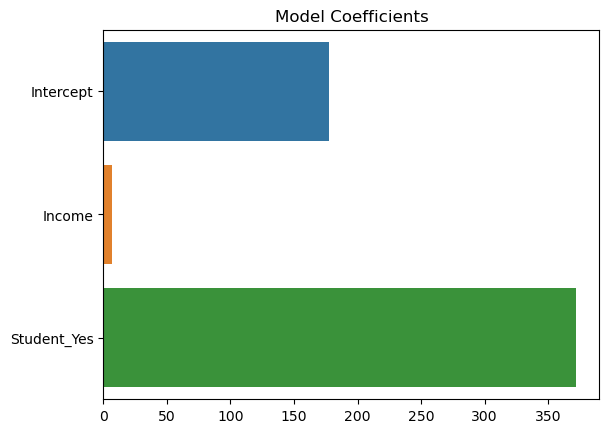

In [52]:
# Visualize crude measure of feature importance.
sns.barplot(data=coefs.T, orient='h').set(title='Model Coefficients');

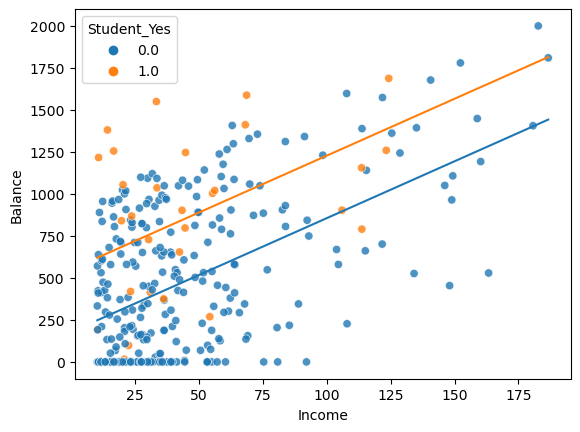

In [62]:
### edTest(test_prediction_lines) ###
# Create space of x values to predict on.
x_space = np.linspace(x['Income'].min(), x['Income'].max(), 1000)

# Generate 2 sets of predictions based on best categorical feature value.
# When categorical feature is true/present (1)
y_hat_yes = 177.658909 + 6.773090 * x_space + 371.895694 * 1
# When categorical feature is false/absent (0)
y_hat_no = 177.658909 + 6.773090 * x_space + 371.895694 * 0

# Plot the 2 prediction lines for students and non-students.
ax = sns.scatterplot(data=pd.concat([x_train_design, y_train], axis=1), x='Income', y='Balance', hue=best_cat_feature, alpha=0.8)
ax.plot(x_space, y_hat_no)
ax.plot(x_space, y_hat_yes)

# Exercise: Features on Different Scales

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [79]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [80]:
df.shape

(200, 4)

In [81]:
X = df.drop('Sales', axis=1)
y = df.Sales.values

In [82]:
lm = LinearRegression().fit(X,y)

In [83]:
# you can learn more about Python format strings here:
# https://docs.python.org/3/tutorial/inputoutput.html
print(f'{"Model Coefficients":>9}')
for col, coef in zip(X.columns, lm.coef_):
    print(f'{col:>9}: {coef:>6.3f}')
print(f'\nR^2: {lm.score(X,y):.4}')

Model Coefficients
       TV:  0.054
    Radio:  0.107
Newspaper:  0.000

R^2: 0.9026


In [84]:
# From info on this kind of assignment statement see:
# https://python-reference.readthedocs.io/en/latest/docs/operators/multiplication_assignment.html
df *= 1000
df.head()

,TV,Radio,Newspaper,Sales
0,230100.0,37800.0,69200.0,22100.0
1,44500.0,39300.0,45100.0,10400.0
2,17200.0,45900.0,69300.0,12000.0
3,151500.0,41300.0,58500.0,16500.0
4,180800.0,10800.0,58400.0,17900.0


In [85]:
# refit a new regression model on the scaled data
X = df.drop('Sales', axis=1)
y = df.Sales.values
lm = LinearRegression().fit(X,y)

print(f'{"Model Coefficients":>9}')
for col, coef in zip(X.columns, lm.coef_):
    print(f'{col:>9}: {coef:>6.3f}')
print(f'\nR^2: {lm.score(X,y):.4}')

Model Coefficients
       TV:  0.054
    Radio:  0.107
Newspaper:  0.000

R^2: 0.9026


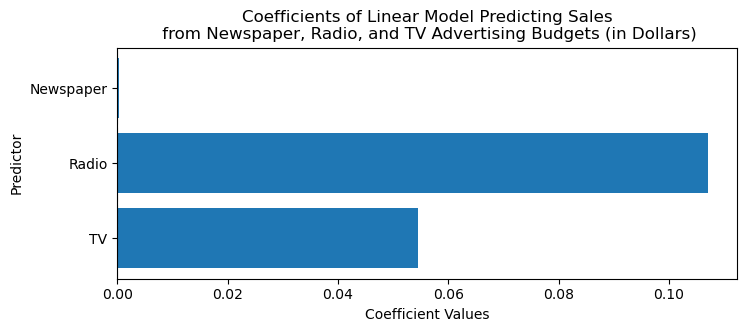

In [86]:
plt.figure(figsize=(8,3))
# column names to be displayed on the y-axis
cols = X.columns
# coeffient values from our fitted model (the intercept is not included)
coefs = lm.coef_
# create the horizontal barplot
plt.barh(cols, coefs)
# dotted, semi-transparent, black vertical line at zero
plt.axvline(0, c='k', ls='--', alpha=0.5)
# always label your axes
plt.ylabel('Predictor')
plt.xlabel('Coefficient Values')
# and create an informative title
plt.title('Coefficients of Linear Model Predicting Sales\n from Newspaper, '\
            'Radio, and TV Advertising Budgets (in Dollars)');

In [87]:
# create a new DataFrame to store the converted budgets
X2 = pd.DataFrame()
X2['TV (Rupee)'] = 200 * df['TV'] # convert to Sri Lankan Rupee
X2['Radio (Won)'] = 1175 * df['Radio'] # convert to South Korean Won
X2['Newspaper (Cedi)'] = 6 * df['Newspaper'] # Convert to Ghanaian Cedi

In [88]:
# we can use our original y as we have not converted the units for Sales
lm2 = LinearRegression().fit(X2,y)

In [89]:
print(f'{"Model Coefficients":>16}')
for col, coef in zip(X2.columns, lm2.coef_):
    print(f'{col:>16}: {coef:>8.5f}')
print(f'\nR^2: {lm2.score(X2,y):.4}')

Model Coefficients
      TV (Rupee):  0.00027
     Radio (Won):  0.00009
Newspaper (Cedi):  0.00006

R^2: 0.9026


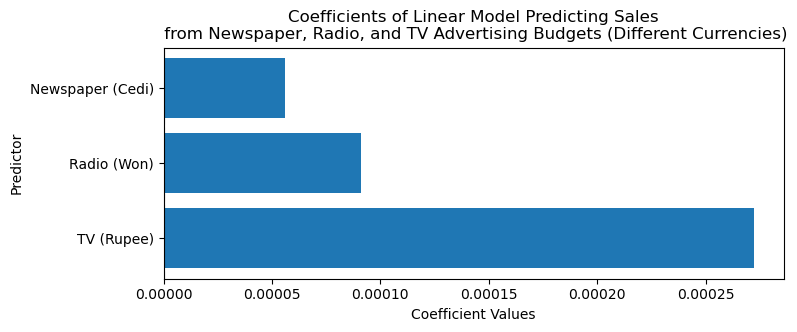

In [90]:
plt.figure(figsize=(8,3))
plt.barh(X2.columns, lm2.coef_)
plt.axvline(0, c='k', ls='--', alpha=0.5)
plt.ylabel('Predictor')
plt.xlabel('Coefficient Values')
plt.title('Coefficients of Linear Model Predicting Sales\n from Newspaper, '\
            'Radio, and TV Advertising Budgets (Different Currencies)');


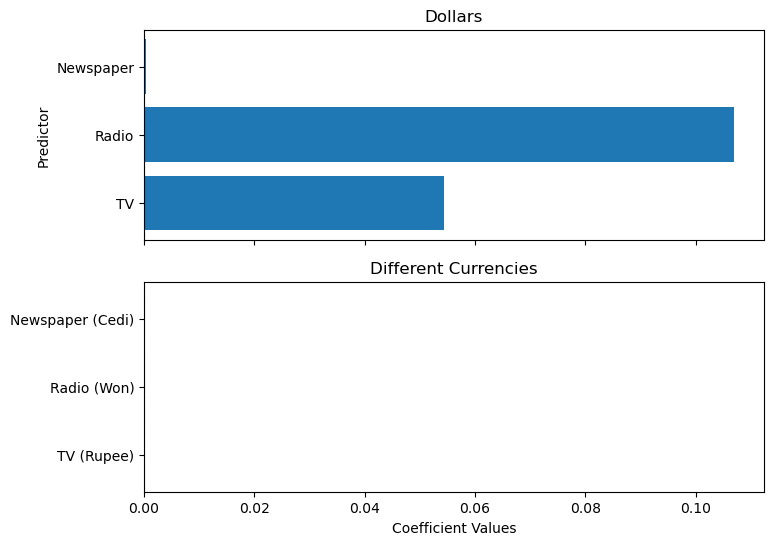

In [91]:
fig, axes = plt.subplots(2,1, figsize=(8,6), sharex=True)

axes[0].barh(X.columns, lm.coef_)
axes[0].set_title('Dollars');
axes[1].barh(X2.columns, lm2.coef_)
axes[1].set_title('Different Currencies')
for ax in axes:
    ax.axvline(0, c='k', ls='--', alpha=0.5)
axes[0].set_ylabel('Predictor')
axes[1].set_xlabel('Coefficient Values');


# Multi-collinearity vs Model Predictions

In [92]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [94]:
# Read the file named "colinearity.csv" into a Pandas dataframe
df = pd.read_csv('colinearity.csv')

In [95]:
df.head()

,x1,x2,x3,x4,y
0,-1.109823,-1.172554,-0.897949,-6.572526,-158.193913
1,0.288381,0.360526,2.298690,3.884887,198.312926
2,-1.059194,0.833067,0.285517,-1.225931,12.152087
3,0.226017,1.979367,0.744038,5.380823,190.281938
4,0.664165,-1.373739,0.317570,-0.437413,-72.681681


In [96]:
df.shape

(1000, 5)

In [97]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['y'],axis=1)

# Choose the response variable 'y' 
y = df.y

In [98]:
### edTest(test_coeff) ###

# Initialize a list to store the beta values for each linear regression model
linear_coef = []

# Loop over all the predictors
# In each loop "i" holds the name of the predictor 
for i in X:
    
    # Set the current predictor as the variable x
    x = df[[i]]

    # Create a linear regression object
    linreg = LinearRegression()

    # Fit the model with training data 
    # Remember to choose only one column at a time i.e. given by x (not X)
    linreg.fit(x,y)
    
    # Add the coefficient value of the model to the list
    linear_coef.append(linreg.coef_)


In [99]:
### edTest(test_multi_coeff) ###

# Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X,y)

# Get the coefficients (plural) of the model
multi_coef = multi_linear.coef_


In [100]:
# Helper code to see the beta values of the linear regression models

print('By simple(one variable) linear regression for each variable:', sep = '\n')

for i in range(4):
    pprint(f'Value of beta{i+1} = {linear_coef[i][0]:.2f}')


By simple(one variable) linear regression for each variable:
'Value of beta1 = 34.73'
'Value of beta2 = 68.63'
'Value of beta3 = 59.40'
'Value of beta4 = 20.92'


In [101]:
# Helper code to compare with the values from the multi-linear regression
print('By multi-Linear regression on all variables')
for i in range(4):
    pprint(f'Value of beta{i+1} = {round(multi_coef[i],2)}')
    

By multi-Linear regression on all variables
'Value of beta1 = -24.61'
'Value of beta2 = 27.72'
'Value of beta3 = 37.67'
'Value of beta4 = 19.27'


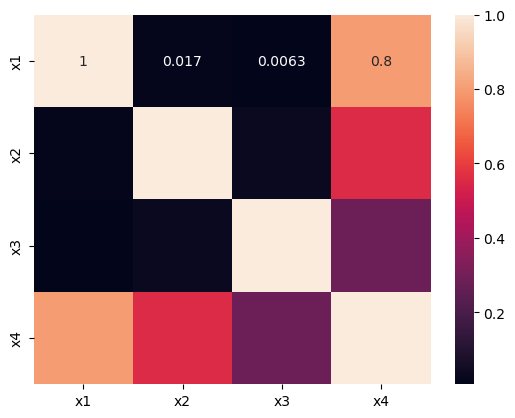

In [102]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = df[['x1','x2','x3','x4']].corr() 
sns.heatmap(corrMatrix, annot=True) 
plt.show()


# Exercise: A Line Won't Cut It

In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [17]:
# Read the data from 'poly.csv' into a Pandas dataframe
df = pd.read_csv('poly.csv')

# Take a quick look at the dataframe
df.head()

,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


In [18]:
# Get the column values for x & y as numpy arrays
x = df[['x']].values
y = df['y'].values

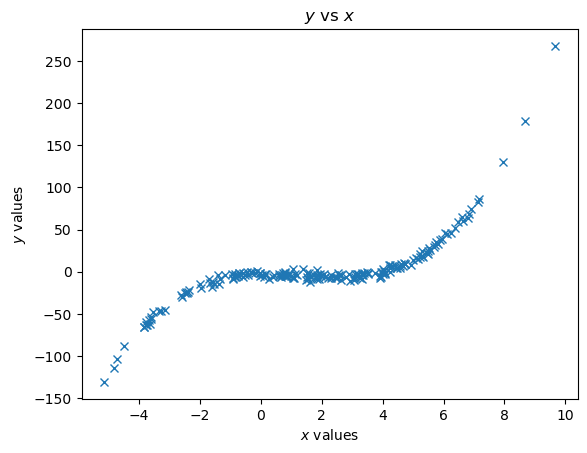

In [19]:
# Helper code to plot x & y to visually inspect the data
fig, ax = plt.subplots()
ax.plot(x,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$')
plt.show();

In [20]:
# Split the data into train and test sets
# Set the train size to 0.8 and random seed to 22
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 22 )

In [21]:
# Initialize a linear model
model = LinearRegression()

# Fit the model on the train data
model.fit(x_train, y_train)

# Get the predictions on the test data using the trained model
y_lin_pred = model.predict(x_test)

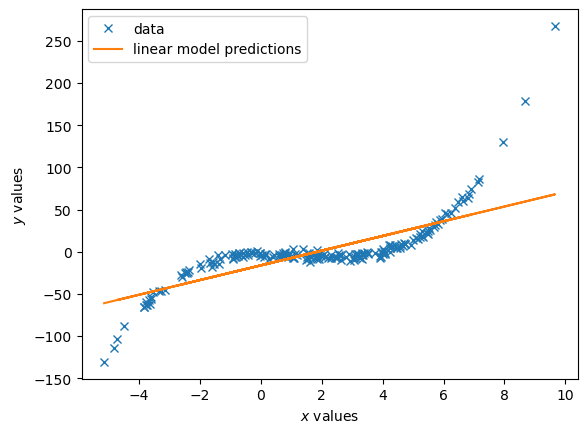

In [22]:
# Helper code to plot x & y to visually inspect the data
fig, ax = plt.subplots()
ax.plot(x,y,'x', label='data')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.plot(x_test, y_lin_pred, label='linear model predictions')
plt.legend();

# Exercise: Polynomial Modeling (USING DEGREE 3)

In [23]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [24]:
# Read the data from 'poly.csv' to a dataframe
df = pd.read_csv('poly.csv')
# Get the column values for x & y in numpy arrays
x = df[['x']].values
y = df['y'].values

In [25]:
# Take a quick look at the dataframe
df.head()

,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


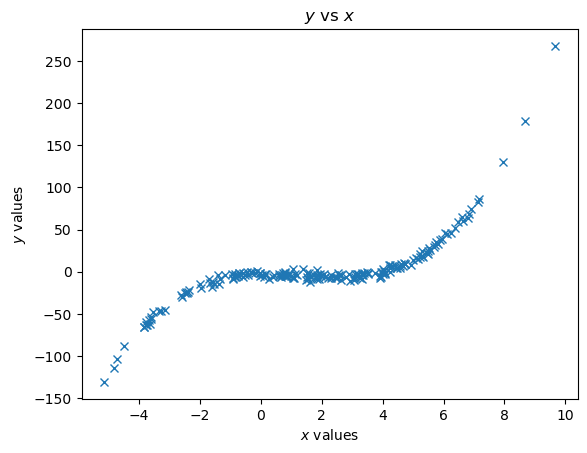

In [26]:
# Plot x & y to visually inspect the data

fig, ax = plt.subplots()
ax.plot(x,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$');

In [27]:
# Fit a linear model on the data
model = LinearRegression()
model.fit(x,y)

# Get the predictions on the entire data using the .predict() function
y_lin_pred = model.predict(x)

In [28]:
### edTest(test_deg) ###
# Now, we try polynomial regression
# GUESS the correct polynomial degree based on the above graph

guess_degree = 3

# Generate polynomial features on the entire data
x_poly= PolynomialFeatures(degree=guess_degree).fit_transform(x)


In [29]:
#Fit a polynomial model on the data, using x_poly as features
# Note: since PolynomialFeatures adds an intercept by default
# we will set fit_intercept to False to avoid having 2 intercepts
polymodel = LinearRegression(fit_intercept=False)
polymodel.fit(x_poly,y)

y_poly_pred = polymodel.predict(x_poly)

In [30]:
# To visualise the results, we create a linspace of evenly spaced values
# This ensures that there are no gaps in our prediction line as well as
# avoiding the need to create a sorted set of our data.
# Worth examining and understand the code 

# create an array of evenly spaced values
x_l = np.linspace(np.min(x),np.max(x),100).reshape(-1, 1)

# Prediction on the linspace values
y_lin_pred_l = model.predict(x_l)

# PolynomialFeatures on the linspace values
x_poly_l= PolynomialFeatures(degree=guess_degree).fit_transform(x_l)

# Prediction on the polynomial linspace values
y_poly_pred_l = polymodel.predict(x_poly_l)

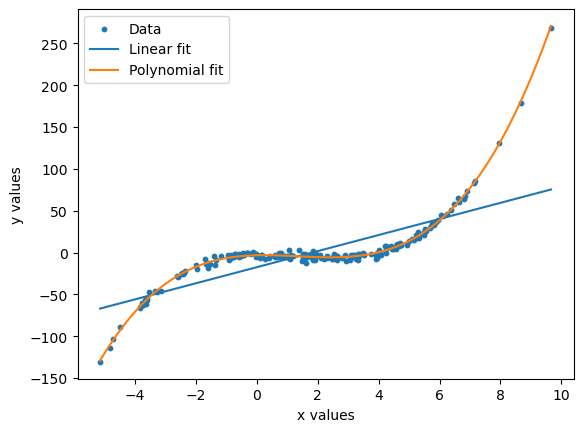

In [31]:
# First plot x & y values using plt.scatter
plt.scatter(x, y, s=10, label="Data")

# Now, plot the linear regression fit curve (using linspace)
plt.plot(x_l,y_lin_pred_l,label="Linear fit")

# Also plot the polynomial regression fit curve (using linspace)
plt.plot(x_l, y_poly_pred_l, label="Polynomial fit")

#Assigning labels to the axes
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

In [35]:
### edTest(test_poly_predictions) ###
#Calculate the residual values for the polynomial model
poly_residuals = y - y_poly_pred
poly_residuals

array([-1.24344841e+00, -3.27057917e-01,  3.46861554e+00,  1.68236984e+00,
        1.74876555e+00, -4.21710726e+00,  1.08168983e-01, -1.65878746e+00,
        1.38353210e+00,  9.29554221e-02,  3.20589343e+00,  9.31241676e-01,
        2.61520879e+00, -9.17137129e-01, -2.45774185e+00, -8.16082346e-01,
       -8.68855248e-02,  1.70491263e+00,  7.19897167e+00,  5.12030335e-01,
       -3.05306394e+00, -7.40121685e-01, -1.17539940e+00,  2.08216436e+00,
       -4.91312558e+00,  7.34892886e-01,  9.73781535e-01,  1.26003103e+00,
       -1.84262020e+00, -7.40034417e-01, -3.80016101e+00, -1.08119742e+00,
       -9.90496430e-01,  1.54599032e+00, -2.87295162e+00,  2.81518556e+00,
        4.55173818e+00, -6.13045780e+00,  1.88102784e+00,  2.61800268e+00,
       -1.28460552e+00, -6.36338113e-01,  4.95639290e-02, -1.09240128e+00,
       -3.07419058e-01, -4.41793857e+00,  4.05377948e+00,  3.48862848e+00,
       -1.95198862e+00, -3.83016878e+00,  2.20105078e+00, -1.33164553e+00,
        1.04561852e+00, -

In [36]:
### edTest(test_linear_predictions) ###
#Calculate the residual values for the linear model
lin_residuals = y - y_lin_pred
lin_residuals

array([  2.26395438,   5.90517949,  23.73225644, -40.09806546,
        -1.85481429, -21.46451209,  20.03004075, -13.47390359,
        -9.02958865,   6.66800569,   0.76957083,  18.07431259,
        19.15860573,  -4.10989419,   5.19803776,   3.2007766 ,
        15.89156121, -11.59296906,  10.52010033, -19.03806959,
       192.44897709,  13.1546254 ,  17.44380598, -18.40349066,
       -50.54126956,   7.75561255,  -4.74964294, -11.55308572,
        12.84695702,  15.98057428,  -5.86650649,   4.42392604,
       -20.04929103,  71.71750195, -19.58168163,   0.79644664,
        25.44480435,  14.924096  , -15.61255683, -13.09268546,
       -16.53289598,   3.70562501,  31.84505233, -11.44563343,
       -19.72297993, -22.8076427 ,  -2.45523061,  20.39581039,
        19.67185232, -17.32918095, -16.731491  ,   4.46318024,
       -18.38404613, -10.4808735 ,  -5.50889194,   9.61883435,
        -6.71670894,  -0.76333176, -24.57216516, -14.58346392,
       -23.49608189, -17.8711105 , -21.16360975,  34.45

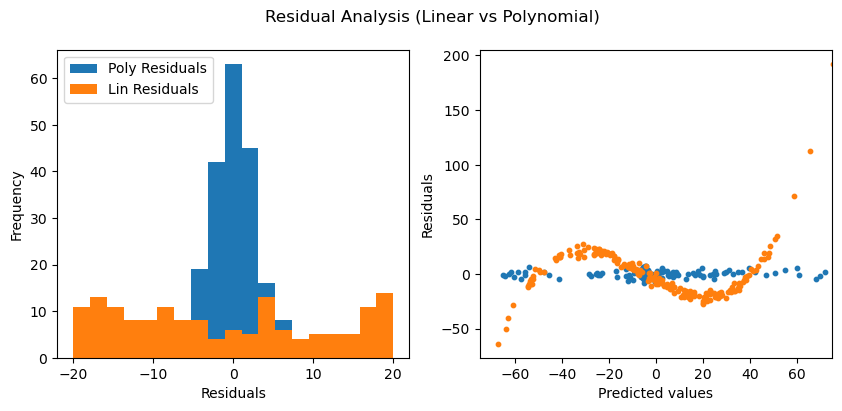

In [37]:
#Use the below helper code to plot residual values
#Plot the histograms of the residuals for the two cases

#Distribution of residuals
fig, ax = plt.subplots(1,2, figsize = (10,4))
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

#Plot the histograms for the polynomial regression
ax[0].hist(poly_residuals, bins,label = 'Poly Residuals')

#Plot the histograms for the linear regression
ax[0].hist(lin_residuals, bins, label = 'Lin Residuals')

ax[0].legend(loc = 'upper left')

# Distribution of predicted values with the residuals
ax[1].scatter(y_poly_pred, poly_residuals, s=10)
ax[1].scatter(y_lin_pred, lin_residuals, s = 10 )
ax[1].set_xlim(-75,75)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')

fig.suptitle('Residual Analysis (Linear vs Polynomial)');

# Exercise: Polynomial Modeling (USING DEGREE 2)

In [60]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [61]:
# Read the data from 'poly.csv' to a dataframe
df = pd.read_csv('poly.csv')
# Get the column values for x & y in numpy arrays
x = df[['x']].values
y = df['y'].values

In [62]:
# Take a quick look at the dataframe
df.head()

,x,y
0,-3.292157,-46.916988
1,0.799528,-3.941553
2,-0.936214,-2.800522
3,-4.722680,-103.030914
4,-3.602674,-54.020819


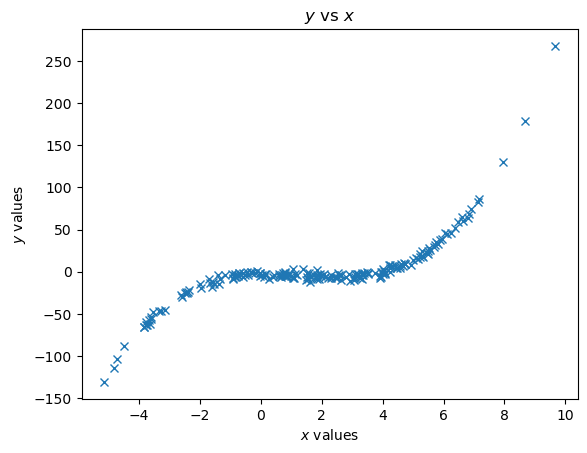

In [63]:
# Plot x & y to visually inspect the data

fig, ax = plt.subplots()
ax.plot(x,y,'x')
ax.set_xlabel('$x$ values')
ax.set_ylabel('$y$ values')
ax.set_title('$y$ vs $x$');

In [64]:
# Fit a linear model on the data
model = LinearRegression()
model.fit(x,y)

# Get the predictions on the entire data using the .predict() function
y_lin_pred = model.predict(x)

In [65]:
### edTest(test_deg) ###
# Now, we try polynomial regression
# GUESS the correct polynomial degree based on the above graph

guess_degree = 2

# Generate polynomial features on the entire data
x_poly= PolynomialFeatures(degree=guess_degree).fit_transform(x)


In [66]:
#Fit a polynomial model on the data, using x_poly as features
# Note: since PolynomialFeatures adds an intercept by default
# we will set fit_intercept to False to avoid having 2 intercepts
polymodel = LinearRegression(fit_intercept=False)
polymodel.fit(x_poly,y)

y_poly_pred = polymodel.predict(x_poly)

In [67]:
# To visualise the results, we create a linspace of evenly spaced values
# This ensures that there are no gaps in our prediction line as well as
# avoiding the need to create a sorted set of our data.
# Worth examining and understand the code 

# create an array of evenly spaced values
x_l = np.linspace(np.min(x),np.max(x),100).reshape(-1, 1)

# Prediction on the linspace values
y_lin_pred_l = model.predict(x_l)

# PolynomialFeatures on the linspace values
x_poly_l= PolynomialFeatures(degree=guess_degree).fit_transform(x_l)

# Prediction on the polynomial linspace values
y_poly_pred_l = polymodel.predict(x_poly_l)

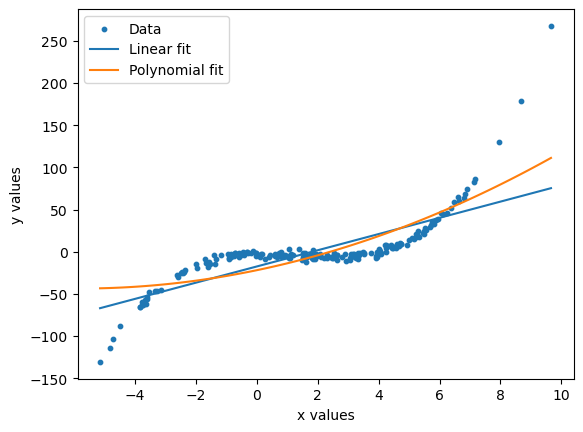

In [68]:
# First plot x & y values using plt.scatter
plt.scatter(x, y, s=10, label="Data")

# Now, plot the linear regression fit curve (using linspace)
plt.plot(x_l,y_lin_pred_l,label="Linear fit")

# Also plot the polynomial regression fit curve (using linspace)
plt.plot(x_l, y_poly_pred_l, label="Polynomial fit")

#Assigning labels to the axes
plt.xlabel("x values")
plt.ylabel("y values")
plt.legend()
plt.show()

In [69]:
### edTest(test_poly_predictions) ###
#Calculate the residual values for the polynomial model
poly_residuals = y - y_poly_pred


In [70]:
### edTest(test_linear_predictions) ###
#Calculate the residual values for the linear model
lin_residuals = y - y_lin_pred

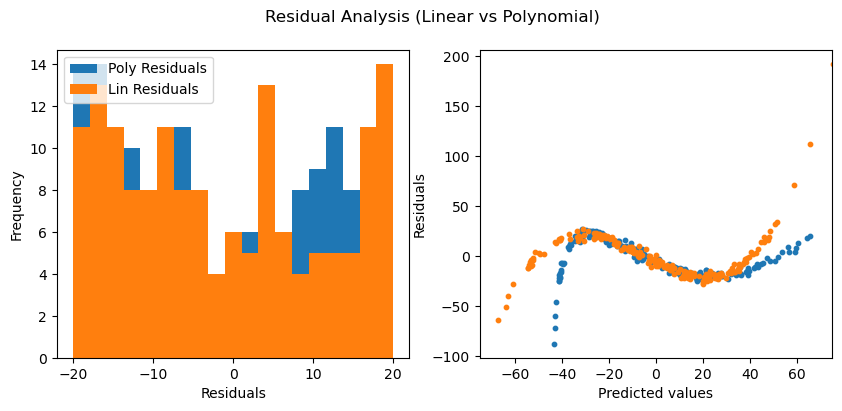

In [71]:
#Use the below helper code to plot residual values
#Plot the histograms of the residuals for the two cases

#Distribution of residuals
fig, ax = plt.subplots(1,2, figsize = (10,4))
bins = np.linspace(-20,20,20)
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

#Plot the histograms for the polynomial regression
ax[0].hist(poly_residuals, bins,label = 'Poly Residuals')

#Plot the histograms for the linear regression
ax[0].hist(lin_residuals, bins, label = 'Lin Residuals')

ax[0].legend(loc = 'upper left')

# Distribution of predicted values with the residuals
ax[1].scatter(y_poly_pred, poly_residuals, s=10)
ax[1].scatter(y_lin_pred, lin_residuals, s = 10 )
ax[1].set_xlim(-75,75)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')

fig.suptitle('Residual Analysis (Linear vs Polynomial)');